# FTT model including constraint and learning

In this notebook the cell magic %latexmodelgrab is used. It allows the specification of segments of the model. 

This the model here is used to merge with the Kenya model. 

version 6 includes:
 - better  max production,
 - better min produciton
 - shares can be adjusted exogenous 
 - global production input into price learning  
 
 version 7 includes unnadas changes implemented in eviews 


In [1]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from IPython.core.display import HTML,Markdown,Latex


from modelclass import model
import modeljupytermagic

# some useful stuf
model.widescreen()
pd.set_option('display.max_rows', None, 'display.max_columns', 10, 'display.precision', 4)

## Define the model
The model is defined by **segments**. Each segment is defined in a cell. This simplifies the specification and allows the developer to focus at each segment and its resulting equations.  
And debugging.

As many segments will use the lists of technologies, segments which name starts 
with **list** will be appended to each segment. 

a model is defined with 

%%latexmodelgrab

 - \<name> Name of the model test 
 - segment=\<list*>|<text*>|<*> rest 
 - display 
 - all   
    
Will create:
 - \<name>
 - \<name>__latex_model_instance

### Changes

- for each sector change demand to production
- calculate average cost for power generation 
- change the cost equations so the cost include learning 

### Define technologies. 
Below the technologies are listed. There are two cells one is defining the lists with only two 
technologies. This is useful when inspecting the model structure. 

The last of the two cells define the lists used in the model, so just reverse the order to change from 
the small to the full model 

%%latexmodelgrab mftt  ndisplay segment=list1

Two lists of technology  are defined: 
    
$List \; i =\{Oil,  Geothermal\} \\  
         fosile: \{  1 , 0 \}$  

$List \; j = \{Oil, Geothermal \}$

In [3]:
%%latexmodelgrab mftt  ndisplay segment=list1

Two lists of technology  are defined: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} \\  
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$  

$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$


Two lists of technology  are defined: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} \\  
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$  

$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$


In [4]:
%%latexmodelgrab mftt  ndisplay segment=text1

Any number of technology can be specified (limited by the avaiable memory)

The time index $_t$ is implicit. 


Any number of technology can be specified (limited by the avaiable memory)

The time index $_t$ is implicit. 


### Preferences

In [5]:
%%latexmodelgrab mftt  ndisplay segment=preferences 

Each technology is compared to all other based on the percieved costs and the preferences (choice likelihood) $F^{i,j}$ are calculated.
    
For all technologies $F^{i,j}+F^{j,i} = 1 $

\begin{equation}
\label{eq:preferences}
\underbrace{F^{i,j}}_{Preferences} = \frac{1}{
1+exp(
    \frac{(Cost\_argumented^{i}-Cost\_argumented^{j})}{\sigma^{i,j}} )}
\end{equation}




Each technology is compared to all other based on the percieved costs and the preferences (choice likelihood) $F^{i,j}$ are calculated.
    
For all technologies $F^{i,j}+F^{j,i} = 1 $

\begin{equation}
\label{eq:preferences}
\underbrace{F^{i,j}}_{Preferences} = \frac{1}{
1+exp(
    \frac{(Cost\_argumented^{i}-Cost\_argumented^{j})}{\sigma^{i,j}} )}
\end{equation}



### Difusion

In [6]:
%%latexmodelgrab mftt  ndisplay segment=difusion 

\begin{equation}
\label{eq:DIFUSION}
 A^{i,j} = \frac{K}{\underbrace{Lead^{i}}_{birthrate} \cdot \underbrace{Tau^{j}}_{Deathrate}}
\end{equation}




\begin{equation}
\label{eq:DIFUSION}
 A^{i,j} = \frac{K}{\underbrace{Lead^{i}}_{birthrate} \cdot \underbrace{Tau^{j}}_{Deathrate}}
\end{equation}



### Share dynamic 

In [7]:
%%latexmodelgrab mftt  ndisplay segment=Share 

Here the shares are determined. Remember that if adjustment is used, it should be balances, that 
is the sum over all technologies should be 0.0 

\begin{equation}
\label{eq:SHARES2}
\Delta Share^{i} = \sum_{j}(Share^{i} \times Share^{j} \times
                            (F^{i,j}\times A^{i,j} - F^{j,i}\times A^{j,i}))
                        + Share\_adjust^{i}
\end{equation}



Here the shares are determined. Remember that if adjustment is used, it should be balances, that 
is the sum over all technologies should be 0.0 

\begin{equation}
\label{eq:SHARES2}
\Delta Share^{i} = \sum_{j}(Share^{i} \times Share^{j} \times
                            (F^{i,j}\times A^{i,j} - F^{j,i}\times A^{j,i}))
                        + Share\_adjust^{i}
\end{equation}


### Sigma

In [8]:
%%latexmodelgrab mftt  display segment=sigma 
The percieved width in the choice function

\begin{equation}
\label{eq:ident,sigma}
\sigma^{i,j} = \sqrt{(\sigma^{i})^{(2)} \cdot (\sigma^{j})^{(2)}}
\end{equation}


The percieved width in the choice function

\begin{equation}
\label{eq:ident,sigma}
\sigma^{i,j} = \sqrt{(\sigma^{i})^{(2)} \cdot (\sigma^{j})^{(2)}}
\end{equation}


## Creating this Template model

do i  $ do j  $
  frml    <ident,sigma> sigma__{i}__{j} = sqrt((sigma__{i})**((2))*(sigma__{j})**((2))) $
enddo $ enddo $ 
LIST I =    I  : OIL  COAL  GAS  BIOMASS  SOLAR  WIND  HYDRO  GEOTHERMAL   / 
         FOSILE:   1   1  1  0  0  0  0  0 $
LIST J =    J  :  OIL  COAL  GAS  BIOMASS  SOLAR  WIND  HYDRO  GEOTHERMAL $



## And this Business Logic Language  model


FRML <IDENT,SIGMA> SIGMA__OIL__OIL = SQRT((SIGMA__OIL)**((2))*(SIGMA__OIL)**((2))) $
FRML <IDENT,SIGMA> SIGMA__OIL__COAL = SQRT((SIGMA__OIL)**((2))*(SIGMA__COAL)**((2))) $
FRML <IDENT,SIGMA> SIGMA__OIL__GAS = SQRT((SIGMA__OIL)**((2))*(SIGMA__GAS)**((2))) $
FRML <IDENT,SIGMA> SIGMA__OIL__BIOMASS = SQRT((SIGMA__OIL)**((2))*(SIGMA__BIOMASS)**((2))) $
FRML <IDENT,SIGMA> SIGMA__OIL__SOLAR = SQRT((SIGMA__OIL)**((2))*(SIGMA__SOLAR)**((2))) $
FRML <IDENT,SIGMA> SIGMA__OIL__WIND = SQRT((SIGMA__OIL)**((2))*(SIGMA__WIND)**((2))) $
FRML <IDENT,SIGMA> SIGMA__OIL__HYDRO = SQRT((SIGMA__OIL)**((2))*(SIGMA__HYDRO)**((2))) $
FRML <IDENT,SIGMA> SIGMA__OIL__GEOTHERMAL = SQRT((SIGMA__OIL)**((2))*(SIGMA__GEOTHERMAL)**((2))) $



FRML <IDENT,SIGMA> SIGMA__COAL__OIL = SQRT((SIGMA__COAL)**((2))*(SIGMA__OIL)**((2))) $
FRML <IDENT,SIGMA> SIGMA__COAL__COAL = SQRT((SIGMA__COAL)**((2))*(SIGMA__COAL)**((2))) $
FRML <IDENT,SIGMA> SIGMA__COAL__GAS = SQRT((SIGMA__COAL)**((2))*(SIGMA__GAS)**((2))) $
FRML <IDENT,SIGMA> 

### Total Demand 

In [9]:
%%latexmodelgrab mftt  ndisplay segment=demand 

\begin{equation}
\label{eq:UD_total}
Demand\_total  = Demand\_total_{t-1} \cdot 
(1+\frac{Demand\_total\_growth}{100})
\end{equation}


\begin{equation}
\label{eq:UD_total}
Demand\_total  = Demand\_total_{t-1} \cdot 
(1+\frac{Demand\_total\_growth}{100})
\end{equation}


### CO^2 emission 

In [10]:
%%latexmodelgrab mftt  ndisplay segment=demand 

\begin{equation}
\label{eq:co2emission}
CO2\_emission^{i} = Production^{i}  \cdot CO2\_Coeff^{i}
\end{equation}

\begin{equation}
\label{eq:total_co2emission}
CO2\_emission\_total = \sum_{i}(CO2\_emission^{i})
\end{equation}


\begin{equation}
\label{eq:co2emission}
CO2\_emission^{i} = Production^{i}  \cdot CO2\_Coeff^{i}
\end{equation}

\begin{equation}
\label{eq:total_co2emission}
CO2\_emission\_total = \sum_{i}(CO2\_emission^{i})
\end{equation}


### Production  local 

In [11]:
%%latexmodelgrab mftt  ndisplay segment=production 

The production from each sector can be calculated. 

\begin{equation}
\label{eq:production}
Production^{i} = Share^{i} \cdot Demand\_total 
\end{equation}



The production from each sector can be calculated. 

\begin{equation}
\label{eq:production}
Production^{i} = Share^{i} \cdot Demand\_total 
\end{equation}


### Capital Cost  

In [59]:
%%latexmodelgrab mftt  ndisplay segment=capital_cost

The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:capital_cost}
Capital\_Cost^{i} = Capital\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}} + Capital\_Cost\_add^{i}
\end{equation}

\begin{equation}
\label{eq:sigma_capital_cost}
Sigma\_Capital\_Cost^{i} = Sigma\_Capital\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}

\begin{equation}
\label{eq:subsidy_capital_cost2}
Capital\_Subsidy\_Cost^{i} = Capital\_Cost^{i} \cdot (-Capital\_Subsidy^{i})   
\end{equation}


\begin{equation}
\label{eq:sigma_capital_subsidy_cost}
Sigma\_Capital\_Subsidy\_Cost^{i} = Sigma\_Capital\_Subsidy\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}


\begin{equation}
\label{eq:total_Subsidy}
Subsidy\_Total = \sum_{i}(Capital\_Subsidy\_Cost^{i} )
\end{equation}





The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:capital_cost}
Capital\_Cost^{i} = Capital\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}} + Capital\_Cost\_add^{i}
\end{equation}

\begin{equation}
\label{eq:sigma_capital_cost}
Sigma\_Capital\_Cost^{i} = Sigma\_Capital\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}

\begin{equation}
\label{eq:subsidy_capital_cost2}
Capital\_Subsidy\_Cost^{i} = Capital\_Cost^{i} \cdot (-Capital\_Subsidy^{i})   
\end{equation}


\begin{equation}
\label{eq:sigma_capital_subsidy_cost}
Sigma\_Capital\_Subsidy\_Cost^{i} = Sigma\_Capital\_Subsidy\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}


\begin{equation}
\label{eq:total_Subsidy}
Subsidy\_Total = \sum_{i}(Capital\_Subsidy\_Cost^{i} )
\end{equation}




### Operating and maintenance  Cost  

In [62]:
%%latexmodelgrab mftt  ndisplay segment=OM_cost

The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:om_cost}
OM\_Cost^{i} = OM\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}

\begin{equation}
\label{eq:sigma_OM_cost}
Sigma\_OM\_Cost^{i} = Sigma\_OM\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}




The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:om_cost}
OM\_Cost^{i} = OM\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}

\begin{equation}
\label{eq:sigma_OM_cost}
Sigma\_OM\_Cost^{i} = Sigma\_OM\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}



### Fuel  Cost  

In [63]:
%%latexmodelgrab mftt  ndisplay segment=Fuel_cost

The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:fuel_cost}
\forall [i=fosile]\:\:  Fuel\_Cost^{i} = Fuel\_Cost^{i}_{t-1} \cdot \frac{price^{i}}{price^{i}_{t-1}}
\end{equation}

\begin{equation}
\label{eq:sigma_fuel_cost}
\forall [i=fosile]\:\:  Sigma\_Fuel\_Cost^{i} = Sigma\_Fuel\_Cost^{i}_{t-1} \cdot 
  \frac{price^{i}}{price^{i}_{t-1}}
\end{equation}


\begin{equation}
\label{eq:fuel_tax}
Fuel\_Tax\_Level^{i} = Fuel\_Cost^{i}_{t-1} \cdot Fuel\_Tax\_rate^{i}
\end{equation}


\begin{equation}
\label{eq:sigma_fuel_tax}
Sigma\_Fuel\_Tax\_Level^{i} = Sigma\_Fuel\_Cost^{i} \cdot Fuel\_Tax\_rate^{i}
\end{equation}





The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:fuel_cost}
\forall [i=fosile]\:\:  Fuel\_Cost^{i} = Fuel\_Cost^{i}_{t-1} \cdot \frac{price^{i}}{price^{i}_{t-1}}
\end{equation}

\begin{equation}
\label{eq:sigma_fuel_cost}
\forall [i=fosile]\:\:  Sigma\_Fuel\_Cost^{i} = Sigma\_Fuel\_Cost^{i}_{t-1} \cdot 
  \frac{price^{i}}{price^{i}_{t-1}}
\end{equation}


\begin{equation}
\label{eq:fuel_tax}
Fuel\_Tax\_Level^{i} = Fuel\_Cost^{i}_{t-1} \cdot Fuel\_Tax\_rate^{i}
\end{equation}


\begin{equation}
\label{eq:sigma_fuel_tax}
Sigma\_Fuel\_Tax\_Level^{i} = Sigma\_Fuel\_Cost^{i} \cdot Fuel\_Tax\_rate^{i}
\end{equation}




### Carbon Tax

In [64]:
%%latexmodelgrab mftt ndisplay segment=Cabon_tax



\begin{equation}
\label{eq:carbon_tax}
Carbon\_tax^{i} = Carbon\_tax\_Rate  \cdot CO2\_Coeff^{i}
\cdot 0.001 \cdot Fuel\_coverage^{i}
\end{equation}

\begin{equation}
\label{eq:total_carbon_tax}
Carbon\_tax\_Total = \sum_{i}(Carbon\_tax^{i})
\end{equation}






\begin{equation}
\label{eq:carbon_tax}
Carbon\_tax^{i} = Carbon\_tax\_Rate  \cdot CO2\_Coeff^{i}
\cdot 0.001 \cdot Fuel\_coverage^{i}
\end{equation}

\begin{equation}
\label{eq:total_carbon_tax}
Carbon\_tax\_Total = \sum_{i}(Carbon\_tax^{i})
\end{equation}



### Total cost 

In [65]:
%%latexmodelgrab mftt  ndisplay segment=total_cost
\begin{equation}
\label{eq:cost}
Cost^{i} = Capital\_Cost^{i} + Capital\_Subsidy\_Cost^{i} + OM\_Cost^{i}
+Fuel\_Cost^{i} + Fuel\_Tax\_Level^{i}
+Carbon\_tax^{i}
\end{equation}

\begin{equation}
\label{eq:sigma_cost}
Sigma^{i} = Sigma\_Capital\_Cost^{i} + Sigma\_Capital\_Subsidy\_Cost^{i} + Sigma\_OM\_Cost^{i}
+Sigma\_Fuel\_Cost^{i} + Sigma\_Fuel\_Tax\_Level^{i}
+Sigma\_Carbon\_tax^{i}
\end{equation}


\begin{equation}
\label{eq:cost}
Cost^{i} = Capital\_Cost^{i} + Capital\_Subsidy\_Cost^{i} + OM\_Cost^{i}
+Fuel\_Cost^{i} + Fuel\_Tax\_Level^{i}
+Carbon\_tax^{i}
\end{equation}

\begin{equation}
\label{eq:sigma_cost}
Sigma^{i} = Sigma\_Capital\_Cost^{i} + Sigma\_Capital\_Subsidy\_Cost^{i} + Sigma\_OM\_Cost^{i}
+Sigma\_Fuel\_Cost^{i} + Sigma\_Fuel\_Tax\_Level^{i}
+Sigma\_Carbon\_tax^{i}
\end{equation}


### Imposing min and max shares  

In [66]:
%%latexmodelgrab mftt  ndisplay segment=min_max 

Sometime there can be constarint (min and/or max) on the shares (or the demand). To enforce constraints
 - a penalty is added to the percieved cost if the share violate the max constrain.  
 - a deduction is subtracted from the cost if the shares violates the min constrain. .  



One way to calculate the penalty would look like this:  
    
\begin{equation}
\label{eqNO:maxout}
\underbrace{penalty\_max\_l^{i}}_{Penalty\_max} = penalty\_multiplier^{i}* Cost^{i}* (Production^{i} > Production\_max^{i}) 
\end{equation}

However in order to get more numerical stability an equation which smooth out the logical expression: $Production^{i} > Production\_max^{i}$  is used: 

\begin{equation}
\label{eq:maxoutlogit}
\underbrace{penalty\_max^{i}}_{Penalty\_max} = penalty\_multiplier^{i} * Cost^{i} * logit^{-1}(penalty\_sensitivity^{i}*(Production^{i} - Production\_max^{i})) 
\end{equation}



Also for the deduction we use a more smooth barriere: 

\begin{equation}
\label{eq:minoutlogit}
deduction\_min^{i} = Cost^{i}* deduction\_multiplier^{i} * logit^{-1}(deduction\_sensitivity^{i}*(Production\_min^{i}-Production^{i})  )
\end{equation}



These penalties and decustions are used to calculate the argumented costs, which  enters the equation for prefereences ($F^{i,j}$)




Sometime there can be constarint (min and/or max) on the shares (or the demand). To enforce constraints
 - a penalty is added to the percieved cost if the share violate the max constrain.  
 - a deduction is subtracted from the cost if the shares violates the min constrain. .  



One way to calculate the penalty would look like this:  
    
\begin{equation}
\label{eqNO:maxout}
\underbrace{penalty\_max\_l^{i}}_{Penalty\_max} = penalty\_multiplier^{i}* Cost^{i}* (Production^{i} > Production\_max^{i}) 
\end{equation}

However in order to get more numerical stability an equation which smooth out the logical expression: $Production^{i} > Production\_max^{i}$  is used: 

\begin{equation}
\label{eq:maxoutlogit}
\underbrace{penalty\_max^{i}}_{Penalty\_max} = penalty\_multiplier^{i} * Cost^{i} * logit^{-1}(penalty\_sensitivity^{i}*(Production^{i} - Production\_max^{i})) 
\end{equation}



Also for the deduction we use a more smooth barriere: 

\begin{equation}
\label{eq:minoutlogit}
deduction\_min^{i} = Cost^{i}* deduction\_multiplier^{i} * logit^{-1}(deduction\_sensitivity^{i}*(Production\_min^{i}-Production^{i})  )
\end{equation}



These penalties and decustions are used to calculate the argumented costs, which  enters the equation for prefereences ($F^{i,j}$)



### Argumented cost 

In [67]:
%%latexmodelgrab mftt  ndisplay segment=Argumented_cost 


\begin{equation}
\label{eq:Z_costbarrier}
Cost\_argumented^{i} = Cost^{i} +  penalty\_max^{i} -  deduction\_min^{i}
\end{equation}



\begin{equation}
\label{eq:Z_costbarrier}
Cost\_argumented^{i} = Cost^{i} +  penalty\_max^{i} -  deduction\_min^{i}
\end{equation}


### Average cost 

In [68]:
%%latexmodelgrab mftt ndisplay segment=average_cost 

To feed into the main model the average cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 

\begin{equation}
\label{eq:Average_cost}
Cost\_average = \sum_{i}(Cost^{i} \cdot Share^{i} ) 
\end{equation}



To feed into the main model the average cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 

\begin{equation}
\label{eq:Average_cost}
Cost\_average = \sum_{i}(Cost^{i} \cdot Share^{i} ) 
\end{equation}


### Max cost 

In [69]:
%%latexmodelgrab mftt ndisplay segment=max_cost 

To feed into the main model the max cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 


\begin{equation}
\label{eq:max_cost}
max\_total  = \max_{i}(Share^{i}) 
\end{equation}


To feed into the main model the max cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 


\begin{equation}
\label{eq:max_cost}
max\_total  = \max_{i}(Share^{i}) 
\end{equation}


### Check, that the shares add up to one. 

In [70]:
%%latexmodelgrab mftt ndisplay segment=check 

\begin{equation}
\label{eq:check_shares}
Share\_total  = \sum_{i}(Share^{i})
\end{equation}


\begin{equation}
\label{eq:check_shares}
Share\_total  = \sum_{i}(Share^{i})
\end{equation}


### Create the share for fosile fuels 

In [71]:
%%latexmodelgrab mftt  ndisplay segment=fosile 

\begin{equation}
\label{eq:share_fosile}
Share\_\_fosile  = \sum_{i=fosile}(Share^{i})
\end{equation}


\begin{equation}
\label{eq:share_fosile}
Share\_\_fosile  = \sum_{i=fosile}(Share^{i})
\end{equation}


### Create equations just for fosile fuels

In [72]:
%%latexmodelgrab mftt  ndisplay segment=fosilesharetest 

\begin{equation}
\label{eq:SHARES3}
\forall [i=fosile]\:\:  fosileshare^{i} = Share^{i} 
\end{equation}




\begin{equation}
\label{eq:SHARES3}
\forall [i=fosile]\:\:  fosileshare^{i} = Share^{i} 
\end{equation}



## Combine all the segments

In [73]:
%%latexmodelgrab mftt ndisplay render=False
# Combined model

In [74]:
mftt.model_description = ''' FTT-Flex for Proof of Concept
Version 7
unnada changes 
with limits on production instead of shares
'''

In [75]:
display(Markdown(mftt.equations_latex))


Two lists of technology  are defined: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} \\  
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$  

$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$


Any number of technology can be specified (limited by the avaiable memory)

The time index $_t$ is implicit. 


Each technology is compared to all other based on the percieved costs and the preferences (choice likelihood) $F^{i,j}$ are calculated.
    
For all technologies $F^{i,j}+F^{j,i} = 1 $

\begin{equation}
\label{eq:preferences}
\underbrace{F^{i,j}}_{Preferences} = \frac{1}{
1+exp(
    \frac{(Cost\_argumented^{i}-Cost\_argumented^{j})}{\sigma^{i,j}} )}
\end{equation}



\begin{equation}
\label{eq:DIFUSION}
 A^{i,j} = \frac{K}{\underbrace{Lead^{i}}_{birthrate} \cdot \underbrace{Tau^{j}}_{Deathrate}}
\end{equation}



Here the shares are determined. Remember that if adjustment is used, it should be balances, that 
is the sum over all technologies should be 0.0 

\begin{equation}
\label{eq:SHARES2}
\Delta Share^{i} = \sum_{j}(Share^{i} \times Share^{j} \times
                            (F^{i,j}\times A^{i,j} - F^{j,i}\times A^{j,i}))
                        + Share\_adjust^{i}
\end{equation}

The percieved width in the choice function

\begin{equation}
\label{eq:ident,sigma}
\sigma^{i,j} = \sqrt{(\sigma^{i})^{(2)} \cdot (\sigma^{j})^{(2)}}
\end{equation}


\begin{equation}
\label{eq:co2emission}
CO2\_emission^{i} = Production^{i}  \cdot CO2\_Coeff^{i}
\end{equation}

\begin{equation}
\label{eq:total_co2emission}
CO2\_emission\_total = \sum_{i}(CO2\_emission^{i})
\end{equation}


The production from each sector can be calculated. 

\begin{equation}
\label{eq:production}
Production^{i} = Share^{i} \cdot Demand\_total 
\end{equation}


The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:capital_cost}
Capital\_Cost^{i} = Capital\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}} + Capital\_Cost\_add^{i}
\end{equation}

\begin{equation}
\label{eq:sigma_capital_cost}
Sigma\_Capital\_Cost^{i} = Sigma\_Capital\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}

\begin{equation}
\label{eq:subsidy_capital_cost2}
Capital\_Subsidy\_Cost^{i} = Capital\_Cost^{i} \cdot (-Capital\_Subsidy^{i})   
\end{equation}


\begin{equation}
\label{eq:sigma_capital_subsidy_cost}
Sigma\_Capital\_Subsidy\_Cost^{i} = Sigma\_Capital\_Subsidy\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}


\begin{equation}
\label{eq:total_Subsidy}
Subsidy\_Total = \sum_{i}(Capital\_Subsidy\_Cost^{i} )
\end{equation}




The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:om_cost}
OM\_Cost^{i} = OM\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}

\begin{equation}
\label{eq:sigma_OM_cost}
Sigma\_OM\_Cost^{i} = Sigma\_OM\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}



The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:fuel_cost}
\forall [i=fosile]\:\:  Fuel\_Cost^{i} = Fuel\_Cost^{i}_{t-1} \cdot \frac{price^{i}}{price^{i}_{t-1}}
\end{equation}

\begin{equation}
\label{eq:sigma_fuel_cost}
\forall [i=fosile]\:\:  Sigma\_Fuel\_Cost^{i} = Sigma\_Fuel\_Cost^{i}_{t-1} \cdot 
  \frac{price^{i}}{price^{i}_{t-1}}
\end{equation}


\begin{equation}
\label{eq:fuel_tax}
Fuel\_Tax\_Level^{i} = Fuel\_Cost^{i}_{t-1} \cdot Fuel\_Tax\_rate^{i}
\end{equation}


\begin{equation}
\label{eq:sigma_fuel_tax}
Sigma\_Fuel\_Tax\_Level^{i} = Sigma\_Fuel\_Cost^{i} \cdot Fuel\_Tax\_rate^{i}
\end{equation}






\begin{equation}
\label{eq:carbon_tax}
Carbon\_tax^{i} = Carbon\_tax\_Rate  \cdot CO2\_Coeff^{i}
\cdot 0.001 \cdot Fuel\_coverage^{i}
\end{equation}

\begin{equation}
\label{eq:total_carbon_tax}
Carbon\_tax\_Total = \sum_{i}(Carbon\_tax^{i})
\end{equation}


\begin{equation}
\label{eq:cost}
Cost^{i} = Capital\_Cost^{i} + Capital\_Subsidy\_Cost^{i} + OM\_Cost^{i}
+Fuel\_Cost^{i} + Fuel\_Tax\_Level^{i}
+Carbon\_tax^{i}
\end{equation}

\begin{equation}
\label{eq:sigma_cost}
Sigma^{i} = Sigma\_Capital\_Cost^{i} + Sigma\_Capital\_Subsidy\_Cost^{i} + Sigma\_OM\_Cost^{i}
+Sigma\_Fuel\_Cost^{i} + Sigma\_Fuel\_Tax\_Level^{i}
+Sigma\_Carbon\_tax^{i}
\end{equation}


Sometime there can be constarint (min and/or max) on the shares (or the demand). To enforce constraints
 - a penalty is added to the percieved cost if the share violate the max constrain.  
 - a deduction is subtracted from the cost if the shares violates the min constrain. .  



One way to calculate the penalty would look like this:  
    
\begin{equation}
\label{eqNO:maxout}
\underbrace{penalty\_max\_l^{i}}_{Penalty\_max} = penalty\_multiplier^{i}* Cost^{i}* (Production^{i} > Production\_max^{i}) 
\end{equation}

However in order to get more numerical stability an equation which smooth out the logical expression: $Production^{i} > Production\_max^{i}$  is used: 

\begin{equation}
\label{eq:maxoutlogit}
\underbrace{penalty\_max^{i}}_{Penalty\_max} = penalty\_multiplier^{i} * Cost^{i} * logit^{-1}(penalty\_sensitivity^{i}*(Production^{i} - Production\_max^{i})) 
\end{equation}



Also for the deduction we use a more smooth barriere: 

\begin{equation}
\label{eq:minoutlogit}
deduction\_min^{i} = Cost^{i}* deduction\_multiplier^{i} * logit^{-1}(deduction\_sensitivity^{i}*(Production\_min^{i}-Production^{i})  )
\end{equation}



These penalties and decustions are used to calculate the argumented costs, which  enters the equation for prefereences ($F^{i,j}$)




\begin{equation}
\label{eq:Z_costbarrier}
Cost\_argumented^{i} = Cost^{i} +  penalty\_max^{i} -  deduction\_min^{i}
\end{equation}


To feed into the main model the average cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 

\begin{equation}
\label{eq:Average_cost}
Cost\_average = \sum_{i}(Cost^{i} \cdot Share^{i} ) 
\end{equation}


To feed into the main model the max cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 


\begin{equation}
\label{eq:max_cost}
max\_total  = \max_{i}(Share^{i}) 
\end{equation}


\begin{equation}
\label{eq:check_shares}
Share\_total  = \sum_{i}(Share^{i})
\end{equation}


\begin{equation}
\label{eq:share_fosile}
Share\_\_fosile  = \sum_{i=fosile}(Share^{i})
\end{equation}


\begin{equation}
\label{eq:SHARES3}
\forall [i=fosile]\:\:  fosileshare^{i} = Share^{i} 
\end{equation}



## Look at some variables 

In [76]:
sorted(mftt.exogene  | mftt.endogene)

['A__BIOMASS__BIOMASS',
 'A__BIOMASS__COAL',
 'A__BIOMASS__GAS',
 'A__BIOMASS__GEOTHERMAL',
 'A__BIOMASS__HYDRO',
 'A__BIOMASS__OIL',
 'A__BIOMASS__SOLAR',
 'A__BIOMASS__WIND',
 'A__COAL__BIOMASS',
 'A__COAL__COAL',
 'A__COAL__GAS',
 'A__COAL__GEOTHERMAL',
 'A__COAL__HYDRO',
 'A__COAL__OIL',
 'A__COAL__SOLAR',
 'A__COAL__WIND',
 'A__GAS__BIOMASS',
 'A__GAS__COAL',
 'A__GAS__GAS',
 'A__GAS__GEOTHERMAL',
 'A__GAS__HYDRO',
 'A__GAS__OIL',
 'A__GAS__SOLAR',
 'A__GAS__WIND',
 'A__GEOTHERMAL__BIOMASS',
 'A__GEOTHERMAL__COAL',
 'A__GEOTHERMAL__GAS',
 'A__GEOTHERMAL__GEOTHERMAL',
 'A__GEOTHERMAL__HYDRO',
 'A__GEOTHERMAL__OIL',
 'A__GEOTHERMAL__SOLAR',
 'A__GEOTHERMAL__WIND',
 'A__HYDRO__BIOMASS',
 'A__HYDRO__COAL',
 'A__HYDRO__GAS',
 'A__HYDRO__GEOTHERMAL',
 'A__HYDRO__HYDRO',
 'A__HYDRO__OIL',
 'A__HYDRO__SOLAR',
 'A__HYDRO__WIND',
 'A__OIL__BIOMASS',
 'A__OIL__COAL',
 'A__OIL__GAS',
 'A__OIL__GEOTHERMAL',
 'A__OIL__HYDRO',
 'A__OIL__OIL',
 'A__OIL__SOLAR',
 'A__OIL__WIND',
 'A__SOLAR__BIOMAS

In [77]:
# mftt.SHARE__OIL.draw(down=0,up=3)

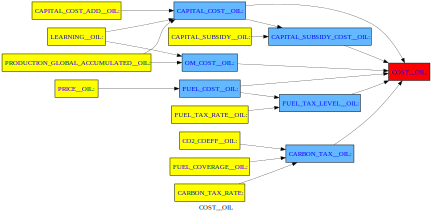

In [78]:
mftt.COST__OIL.draw(down=0,up=2)

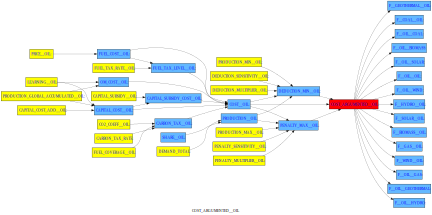

In [79]:
mftt.COST_ARGUMENTED__OIL.draw(down=1,up=3)

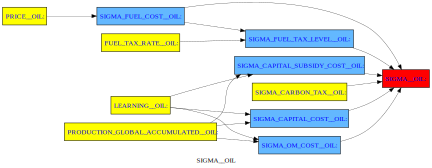

In [80]:
mftt.SIGMA__OIL.draw(down=0,up=2)

In [81]:
# mftt.drawmodel(svg=1,browser=0)

In [82]:
2+2

4

## All phases of the combined model can be displayed:

In [83]:
if 1: 
    mftt_latex_model_instance.show


Two lists of technology  are defined: 
    
$List \; i =\{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal\} \\  
         fosile: \{  1 , 1, 1, 0, 0, 0, 0, 0 \}$  

$List \; j = \{Oil, Coal, Gas, Biomass, Solar, Wind, Hydro, Geothermal \}$


Any number of technology can be specified (limited by the avaiable memory)

The time index $_t$ is implicit. 


Each technology is compared to all other based on the percieved costs and the preferences (choice likelihood) $F^{i,j}$ are calculated.
    
For all technologies $F^{i,j}+F^{j,i} = 1 $

\begin{equation}
\label{eq:preferences}
\underbrace{F^{i,j}}_{Preferences} = \frac{1}{
1+exp(
    \frac{(Cost\_argumented^{i}-Cost\_argumented^{j})}{\sigma^{i,j}} )}
\end{equation}



\begin{equation}
\label{eq:DIFUSION}
 A^{i,j} = \frac{K}{\underbrace{Lead^{i}}_{birthrate} \cdot \underbrace{Tau^{j}}_{Deathrate}}
\end{equation}



Here the shares are determined. Remember that if adjustment is used, it should be balances, that 
is the sum over all technologies should be 0.0 

\begin{equation}
\label{eq:SHARES2}
\Delta Share^{i} = \sum_{j}(Share^{i} \times Share^{j} \times
                            (F^{i,j}\times A^{i,j} - F^{j,i}\times A^{j,i}))
                        + Share\_adjust^{i}
\end{equation}

The percieved width in the choice function

\begin{equation}
\label{eq:ident,sigma}
\sigma^{i,j} = \sqrt{(\sigma^{i})^{(2)} \cdot (\sigma^{j})^{(2)}}
\end{equation}


\begin{equation}
\label{eq:co2emission}
CO2\_emission^{i} = Production^{i}  \cdot CO2\_Coeff^{i}
\end{equation}

\begin{equation}
\label{eq:total_co2emission}
CO2\_emission\_total = \sum_{i}(CO2\_emission^{i})
\end{equation}


The production from each sector can be calculated. 

\begin{equation}
\label{eq:production}
Production^{i} = Share^{i} \cdot Demand\_total 
\end{equation}


The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:capital_cost}
Capital\_Cost^{i} = Capital\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}} + Capital\_Cost\_add^{i}
\end{equation}

\begin{equation}
\label{eq:sigma_capital_cost}
Sigma\_Capital\_Cost^{i} = Sigma\_Capital\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}

\begin{equation}
\label{eq:subsidy_capital_cost2}
Capital\_Subsidy\_Cost^{i} = Capital\_Cost^{i} \cdot (-Capital\_Subsidy^{i})   
\end{equation}


\begin{equation}
\label{eq:sigma_capital_subsidy_cost}
Sigma\_Capital\_Subsidy\_Cost^{i} = Sigma\_Capital\_Subsidy\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}


\begin{equation}
\label{eq:total_Subsidy}
Subsidy\_Total = \sum_{i}(Capital\_Subsidy\_Cost^{i} )
\end{equation}




The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:om_cost}
OM\_Cost^{i} = OM\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}

\begin{equation}
\label{eq:sigma_OM_cost}
Sigma\_OM\_Cost^{i} = Sigma\_OM\_Cost^{i}_{t-1} \cdot 
   (1 - dlog(Production\_global\_accumulated^{i}))^{Learning^{i}}
\end{equation}



The price of new technology falls in line with its accumulated use through a number of effects.

It depends in global accumulated production.


\begin{equation}
\label{eq:fuel_cost}
\forall [i=fosile]\:\:  Fuel\_Cost^{i} = Fuel\_Cost^{i}_{t-1} \cdot \frac{price^{i}}{price^{i}_{t-1}}
\end{equation}

\begin{equation}
\label{eq:sigma_fuel_cost}
\forall [i=fosile]\:\:  Sigma\_Fuel\_Cost^{i} = Sigma\_Fuel\_Cost^{i}_{t-1} \cdot 
  \frac{price^{i}}{price^{i}_{t-1}}
\end{equation}


\begin{equation}
\label{eq:fuel_tax}
Fuel\_Tax\_Level^{i} = Fuel\_Cost^{i}_{t-1} \cdot Fuel\_Tax\_rate^{i}
\end{equation}


\begin{equation}
\label{eq:sigma_fuel_tax}
Sigma\_Fuel\_Tax\_Level^{i} = Sigma\_Fuel\_Cost^{i} \cdot Fuel\_Tax\_rate^{i}
\end{equation}






\begin{equation}
\label{eq:carbon_tax}
Carbon\_tax^{i} = Carbon\_tax\_Rate  \cdot CO2\_Coeff^{i}
\cdot 0.001 \cdot Fuel\_coverage^{i}
\end{equation}

\begin{equation}
\label{eq:total_carbon_tax}
Carbon\_tax\_Total = \sum_{i}(Carbon\_tax^{i})
\end{equation}


\begin{equation}
\label{eq:cost}
Cost^{i} = Capital\_Cost^{i} + Capital\_Subsidy\_Cost^{i} + OM\_Cost^{i}
+Fuel\_Cost^{i} + Fuel\_Tax\_Level^{i}
+Carbon\_tax^{i}
\end{equation}

\begin{equation}
\label{eq:sigma_cost}
Sigma^{i} = Sigma\_Capital\_Cost^{i} + Sigma\_Capital\_Subsidy\_Cost^{i} + Sigma\_OM\_Cost^{i}
+Sigma\_Fuel\_Cost^{i} + Sigma\_Fuel\_Tax\_Level^{i}
+Sigma\_Carbon\_tax^{i}
\end{equation}


Sometime there can be constarint (min and/or max) on the shares (or the demand). To enforce constraints
 - a penalty is added to the percieved cost if the share violate the max constrain.  
 - a deduction is subtracted from the cost if the shares violates the min constrain. .  



One way to calculate the penalty would look like this:  
    
\begin{equation}
\label{eqNO:maxout}
\underbrace{penalty\_max\_l^{i}}_{Penalty\_max} = penalty\_multiplier^{i}* Cost^{i}* (Production^{i} > Production\_max^{i}) 
\end{equation}

However in order to get more numerical stability an equation which smooth out the logical expression: $Production^{i} > Production\_max^{i}$  is used: 

\begin{equation}
\label{eq:maxoutlogit}
\underbrace{penalty\_max^{i}}_{Penalty\_max} = penalty\_multiplier^{i} * Cost^{i} * logit^{-1}(penalty\_sensitivity^{i}*(Production^{i} - Production\_max^{i})) 
\end{equation}



Also for the deduction we use a more smooth barriere: 

\begin{equation}
\label{eq:minoutlogit}
deduction\_min^{i} = Cost^{i}* deduction\_multiplier^{i} * logit^{-1}(deduction\_sensitivity^{i}*(Production\_min^{i}-Production^{i})  )
\end{equation}



These penalties and decustions are used to calculate the argumented costs, which  enters the equation for prefereences ($F^{i,j}$)




\begin{equation}
\label{eq:Z_costbarrier}
Cost\_argumented^{i} = Cost^{i} +  penalty\_max^{i} -  deduction\_min^{i}
\end{equation}


To feed into the main model the average cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 

\begin{equation}
\label{eq:Average_cost}
Cost\_average = \sum_{i}(Cost^{i} \cdot Share^{i} ) 
\end{equation}


To feed into the main model the max cost is calculated. 
This is done on the actual cost, not the argumented cost which can deviate from
the actual cost in order to impose constraints. 


\begin{equation}
\label{eq:max_cost}
max\_total  = \max_{i}(Share^{i}) 
\end{equation}


\begin{equation}
\label{eq:check_shares}
Share\_total  = \sum_{i}(Share^{i})
\end{equation}


\begin{equation}
\label{eq:share_fosile}
Share\_\_fosile  = \sum_{i=fosile}(Share^{i})
\end{equation}


\begin{equation}
\label{eq:SHARES3}
\forall [i=fosile]\:\:  fosileshare^{i} = Share^{i} 
\end{equation}



## Creating this Template model

```do i  $ do j  $
  frml    <preferences> F__{i}__{j} = ((1)/(1+exp( (((Cost_argumented__{i}-Cost_argumented__{j}))/(sigma__{i}__{j})) ))) $
enddo $ enddo $ 
do i  $ do j  $
  frml    <DIFUSION> A__{i}__{j} = ((K)/(Lead__{i}*Tau__{j})) $
enddo $ enddo $ 
do i  $
  frml    <SHARES2> diff(Share__{i}) = sum(j,Share__{i}*Share__{j}*(F__{i}__{j}*A__{i}__{j} - F__{j}__{i}*A__{j}__{i})) + Share_adjust__{i} $
enddo $ 
do i  $ do j  $
  frml    <ident,sigma> sigma__{i}__{j} = sqrt((sigma__{i})**((2))*(sigma__{j})**((2))) $
enddo $ enddo $ 
do i  $
  frml    <co2emission> CO2_emission__{i} = Production__{i}*CO2_Coeff__{i} $
enddo $ 
frml <total_co2emission> CO2_emission_total = sum(i,CO2_emission__{i}) $
do i  $
  frml    <production> Production__{i} = Share__{i}*Demand_total $
enddo $ 
do i  $
  frml    <capital_cost> Capital_Cost__{i} = Capital_Cost__{i}(-1)*(1 - dlog(Production_global_accumulated__{i}))**(Learning__{i}) + Capital_Cost_add__{i} $
enddo $ 
do i  $
  frml    <sigma_capital_cost> Sigma_Capital_Cost__{i} = Sigma_Capital_Cost__{i}(-1)*(1 - dlog(Production_global_accumulated__{i}))**(Learning__{i}) $
enddo $ 
do i  $
  frml    <subsidy_capital_cost2> Capital_Subsidy_Cost__{i} = Capital_Cost__{i}*(-Capital_Subsidy__{i}) $
enddo $ 
do i  $
  frml    <sigma_capital_subsidy_cost> Sigma_Capital_Subsidy_Cost__{i} = Sigma_Capital_Subsidy_Cost__{i}(-1)*(1 - dlog(Production_global_accumulated__{i}))**(Learning__{i}) $
enddo $ 
frml <total_Subsidy> Subsidy_Total = sum(i,Capital_Subsidy_Cost__{i} ) $
do i  $
  frml    <om_cost> OM_Cost__{i} = OM_Cost__{i}(-1)*(1 - dlog(Production_global_accumulated__{i}))**(Learning__{i}) $
enddo $ 
do i  $
  frml    <sigma_OM_cost> Sigma_OM_Cost__{i} = Sigma_OM_Cost__{i}(-1)*(1 - dlog(Production_global_accumulated__{i}))**(Learning__{i}) $
enddo $ 
do i fosile = 1 $
  frml    <fuel_cost> \:\: Fuel_Cost__{i} = Fuel_Cost__{i}(-1)*((price__{i})/(price__{i}(-1))) $
enddo $ 
do i fosile = 1 $
  frml    <sigma_fuel_cost> \:\: Sigma_Fuel_Cost__{i} = Sigma_Fuel_Cost__{i}(-1)*((price__{i})/(price__{i}(-1))) $
enddo $ 
do i  $
  frml    <fuel_tax> Fuel_Tax_Level__{i} = Fuel_Cost__{i}(-1)*Fuel_Tax_rate__{i} $
enddo $ 
do i  $
  frml    <sigma_fuel_tax> Sigma_Fuel_Tax_Level__{i} = Sigma_Fuel_Cost__{i}*Fuel_Tax_rate__{i} $
enddo $ 
do i  $
  frml    <carbon_tax> Carbon_tax__{i} = Carbon_tax_Rate*CO2_Coeff__{i}*0.001*Fuel_coverage__{i} $
enddo $ 
frml <total_carbon_tax> Carbon_tax_Total = sum(i,Carbon_tax__{i}) $
do i  $
  frml    <cost> Cost__{i} = Capital_Cost__{i} + Capital_Subsidy_Cost__{i} + OM_Cost__{i}+Fuel_Cost__{i} + Fuel_Tax_Level__{i}+Carbon_tax__{i} $
enddo $ 
do i  $
  frml    <sigma_cost> Sigma__{i} = Sigma_Capital_Cost__{i} + Sigma_Capital_Subsidy_Cost__{i} + Sigma_OM_Cost__{i}+Sigma_Fuel_Cost__{i} + Sigma_Fuel_Tax_Level__{i}+Sigma_Carbon_tax__{i} $
enddo $ 
do i  $
  frml    <maxoutlogit> penalty_max__{i} = penalty_multiplier__{i} * Cost__{i} * logit_inverse(penalty_sensitivity__{i}*(Production__{i} - Production_max__{i})) $
enddo $ 
do i  $
  frml    <minoutlogit> deduction_min__{i} = Cost__{i}* deduction_multiplier__{i} * logit_inverse(deduction_sensitivity__{i}*(Production_min__{i}-Production__{i}) ) $
enddo $ 
do i  $
  frml    <Z_costbarrier> Cost_argumented__{i} = Cost__{i} + penalty_max__{i} - deduction_min__{i} $
enddo $ 
frml <Average_cost> Cost_average = sum(i,Cost__{i}*Share__{i} ) $
frml <max_cost> max_total = lmax(i,Share__{i}) $
frml <check_shares> Share_total = sum(i,Share__{i}) $
frml <share_fosile> Share__fosile = sum(i fosile=1,Share__{i}) $
do i fosile = 1 $
  frml    <SHARES3> \:\: fosileshare__{i} = Share__{i} $
enddo $ 
LIST I =    I  : OIL  COAL  GAS  BIOMASS  SOLAR  WIND  HYDRO  GEOTHERMAL   / 
         FOSILE:   1   1  1  0  0  0  0  0 $
LIST J =    J  :  OIL  COAL  GAS  BIOMASS  SOLAR  WIND  HYDRO  GEOTHERMAL $
```

## And this Business Logic Language  model


FRML <PREFERENCES> F__OIL__OIL = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__OIL))/(SIGMA__OIL__OIL)) ))) $
FRML <PREFERENCES> F__OIL__COAL = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__COAL))/(SIGMA__OIL__COAL)) ))) $
FRML <PREFERENCES> F__OIL__GAS = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__GAS))/(SIGMA__OIL__GAS)) ))) $
FRML <PREFERENCES> F__OIL__BIOMASS = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__BIOMASS))/(SIGMA__OIL__BIOMASS)) ))) $
FRML <PREFERENCES> F__OIL__SOLAR = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__SOLAR))/(SIGMA__OIL__SOLAR)) ))) $
FRML <PREFERENCES> F__OIL__WIND = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__WIND))/(SIGMA__OIL__WIND)) ))) $
FRML <PREFERENCES> F__OIL__HYDRO = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__HYDRO))/(SIGMA__OIL__HYDRO)) ))) $
FRML <PREFERENCES> F__OIL__GEOTHERMAL = ((1)/(1+EXP( (((COST_ARGUMENTED__OIL-COST_ARGUMENTED__GEOTHERMAL))/(SIGMA__OIL__GEOTHERMAL)) ))) $



F

## read kenya data 

In [84]:
dfkenstart = pd.read_excel('digested.xlsx',index_col = 0 )

## Do we have the variables we expect 

In [85]:
df_var = set(dfkenstart.columns)

### The exogenous variables not in the data should be ok

In [86]:
mftt.exogene.difference(df_var)


{'CAPITAL_COST_ADD__BIOMASS',
 'CAPITAL_COST_ADD__COAL',
 'CAPITAL_COST_ADD__GAS',
 'CAPITAL_COST_ADD__GEOTHERMAL',
 'CAPITAL_COST_ADD__HYDRO',
 'CAPITAL_COST_ADD__OIL',
 'CAPITAL_COST_ADD__SOLAR',
 'CAPITAL_COST_ADD__WIND',
 'DEDUCTION_MULTIPLIER__BIOMASS',
 'DEDUCTION_MULTIPLIER__COAL',
 'DEDUCTION_MULTIPLIER__GAS',
 'DEDUCTION_MULTIPLIER__GEOTHERMAL',
 'DEDUCTION_MULTIPLIER__HYDRO',
 'DEDUCTION_MULTIPLIER__OIL',
 'DEDUCTION_MULTIPLIER__SOLAR',
 'DEDUCTION_MULTIPLIER__WIND',
 'DEDUCTION_SENSITIVITY__BIOMASS',
 'DEDUCTION_SENSITIVITY__COAL',
 'DEDUCTION_SENSITIVITY__GAS',
 'DEDUCTION_SENSITIVITY__GEOTHERMAL',
 'DEDUCTION_SENSITIVITY__HYDRO',
 'DEDUCTION_SENSITIVITY__OIL',
 'DEDUCTION_SENSITIVITY__SOLAR',
 'DEDUCTION_SENSITIVITY__WIND',
 'K',
 'PENALTY_MULTIPLIER__BIOMASS',
 'PENALTY_MULTIPLIER__COAL',
 'PENALTY_MULTIPLIER__GAS',
 'PENALTY_MULTIPLIER__GEOTHERMAL',
 'PENALTY_MULTIPLIER__HYDRO',
 'PENALTY_MULTIPLIER__OIL',
 'PENALTY_MULTIPLIER__SOLAR',
 'PENALTY_MULTIPLIER__WIND',
 'PENA


### variables in data but not in model 

In [87]:
{ v for v in df_var.difference(mftt.endogene | mftt.exogene) 
     if not (v.endswith('NUCLEAR') or v.endswith('IMPORTS'))}

{'TOTALCTREV', 'TOTALFTREV', 'TOTALSUBEXP'}

### all endogenous variables with a lag 

In [88]:
endo_lag = {v for v in mftt.endogene if mftt.allvar[v]['maxlag']==-1 }

In [89]:
 endo_lag.difference(df_var)

{'SIGMA_CAPITAL_SUBSIDY_COST__BIOMASS',
 'SIGMA_CAPITAL_SUBSIDY_COST__COAL',
 'SIGMA_CAPITAL_SUBSIDY_COST__GAS',
 'SIGMA_CAPITAL_SUBSIDY_COST__GEOTHERMAL',
 'SIGMA_CAPITAL_SUBSIDY_COST__HYDRO',
 'SIGMA_CAPITAL_SUBSIDY_COST__OIL',
 'SIGMA_CAPITAL_SUBSIDY_COST__SOLAR',
 'SIGMA_CAPITAL_SUBSIDY_COST__WIND'}

Ok that sounds fair. 

## we need some parameters 

In [90]:
%%dataframe  exoparam   show  periods=71 melt start=1980
                           Oil     Coal    Gas      Biomass     Solar   Wind   Hydro  Geothermal
Penalty_multiplier_          3        3      3            3        3       3       3           3  
Penalty_sensitivity_         3        3      3            3        3       3       3           3  
Deduction_multiplier_        3        3      3            3        3       3       3           3  
Deduction_sensitivity_       3        3      3            3        3       3       3           3 

,OIL,COAL,GAS,BIOMASS,SOLAR,WIND,HYDRO,GEOTHERMAL
PENALTY_MULTIPLIER_,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
PENALTY_SENSITIVITY_,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
DEDUCTION_MULTIPLIER_,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
DEDUCTION_SENSITIVITY_,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


var_name,PENALTY_MULTIPLIER__OIL,PENALTY_SENSITIVITY__OIL,DEDUCTION_MULTIPLIER__OIL,DEDUCTION_SENSITIVITY__OIL,PENALTY_MULTIPLIER__COAL,...,DEDUCTION_SENSITIVITY__HYDRO,PENALTY_MULTIPLIER__GEOTHERMAL,PENALTY_SENSITIVITY__GEOTHERMAL,DEDUCTION_MULTIPLIER__GEOTHERMAL,DEDUCTION_SENSITIVITY__GEOTHERMAL
index,,,,,,,,,,,
1980,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0
1981,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0
1982,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0
1983,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0
1984,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0
1985,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0
1986,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0
1987,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0
1988,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0


### Combine excelinput and parameters

In [91]:
dfken = pd.concat([dfkenstart,exoparam_melted],axis=1).upd('K = 10.')

In [92]:
set(dfken.columns).difference(mftt.endogene | mftt.exogene)

{'CAPITAL_COST__IMPORTS',
 'CAPITAL_COST__NUCLEAR',
 'CAPITAL_SUBSIDY__IMPORTS',
 'CAPITAL_SUBSIDY__NUCLEAR',
 'CO2_COEFF__IMPORTS',
 'CO2_COEFF__NUCLEAR',
 'COST__IMPORTS',
 'COST__NUCLEAR',
 'FUEL_COST__IMPORTS',
 'FUEL_COST__NUCLEAR',
 'FUEL_COVERAGE__IMPORTS',
 'FUEL_COVERAGE__NUCLEAR',
 'FUEL_TAX_RATE__IMPORTS',
 'FUEL_TAX_RATE__NUCLEAR',
 'LEAD__IMPORTS',
 'LEAD__NUCLEAR',
 'LEARNING__IMPORTS',
 'LEARNING__NUCLEAR',
 'OM_COST__IMPORTS',
 'OM_COST__NUCLEAR',
 'PRODUCTION_GLOBAL_ACCUMULATED__IMPORTS',
 'PRODUCTION_GLOBAL_ACCUMULATED__NUCLEAR',
 'PRODUCTION_MAX__IMPORTS',
 'PRODUCTION_MAX__NUCLEAR',
 'PRODUCTION_MIN__IMPORTS',
 'PRODUCTION_MIN__NUCLEAR',
 'SHARE__IMPORTS',
 'SHARE__NUCLEAR',
 'SIGMA_CAPITAL_COST__IMPORTS',
 'SIGMA_CAPITAL_COST__NUCLEAR',
 'SIGMA_FUEL_COST__IMPORTS',
 'SIGMA_FUEL_COST__NUCLEAR',
 'SIGMA_OM_COST__IMPORTS',
 'SIGMA_OM_COST__NUCLEAR',
 'SIGMA__IMPORTS',
 'SIGMA__NUCLEAR',
 'TAU__IMPORTS',
 'TAU__NUCLEAR',
 'TOTALCTREV',
 'TOTALFTREV',
 'TOTALSUBEXP'}

In [93]:
(mftt.exogene).difference(set(dfken.columns))

{'CAPITAL_COST_ADD__BIOMASS',
 'CAPITAL_COST_ADD__COAL',
 'CAPITAL_COST_ADD__GAS',
 'CAPITAL_COST_ADD__GEOTHERMAL',
 'CAPITAL_COST_ADD__HYDRO',
 'CAPITAL_COST_ADD__OIL',
 'CAPITAL_COST_ADD__SOLAR',
 'CAPITAL_COST_ADD__WIND',
 'SHARE_ADJUST__BIOMASS',
 'SHARE_ADJUST__COAL',
 'SHARE_ADJUST__GAS',
 'SHARE_ADJUST__GEOTHERMAL',
 'SHARE_ADJUST__HYDRO',
 'SHARE_ADJUST__OIL',
 'SHARE_ADJUST__SOLAR',
 'SHARE_ADJUST__WIND',
 'SIGMA_CARBON_TAX__BIOMASS',
 'SIGMA_CARBON_TAX__COAL',
 'SIGMA_CARBON_TAX__GAS',
 'SIGMA_CARBON_TAX__GEOTHERMAL',
 'SIGMA_CARBON_TAX__HYDRO',
 'SIGMA_CARBON_TAX__OIL',
 'SIGMA_CARBON_TAX__SOLAR',
 'SIGMA_CARBON_TAX__WIND'}

In [94]:
endo_lag.difference(set(dfken.columns))

{'SIGMA_CAPITAL_SUBSIDY_COST__BIOMASS',
 'SIGMA_CAPITAL_SUBSIDY_COST__COAL',
 'SIGMA_CAPITAL_SUBSIDY_COST__GAS',
 'SIGMA_CAPITAL_SUBSIDY_COST__GEOTHERMAL',
 'SIGMA_CAPITAL_SUBSIDY_COST__HYDRO',
 'SIGMA_CAPITAL_SUBSIDY_COST__OIL',
 'SIGMA_CAPITAL_SUBSIDY_COST__SOLAR',
 'SIGMA_CAPITAL_SUBSIDY_COST__WIND'}

## Define some groups for display

In [95]:
mftt.var_groups = {
 'Production': 'production__*',
 'Hydro': 'production__hy* penal*hydro cost*hydro',
 'Shares': 'share__[!M]* share_total',
 'Cost': 'c_t* cost*',
 'Demand': 'useful*',
 'cost deduction for minimum ': 'deduct*',
 'cost penalty  for maximum ': 'penal*',
 'all': '*'}

## Make a baseline solution 
And store the model and dataframes 

In [96]:
baseline = mftt.insertModelVar(dfken).fillna(0.0) # to make a complete dataframe with all variables in the model

In [120]:
mftt.keep_solutions = {}   # to clean up with new experiments
res2 = mftt(baseline,2022,2050,keep='Baseline',alfa=0.8,silent=1,solver='sim')



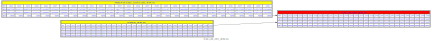

In [122]:
mftt.sigma_OM_COST__biomass.tracepre(fokus2all=True,up=1,svg=1,browser=1)

In [99]:
mftt.sigma_capital_cost__biomass

Endogeneous: SIGMA_CAPITAL_COST__BIOMASS: 
Formular: FRML <SIGMA_CAPITAL_COST> SIGMA_CAPITAL_COST__BIOMASS = SIGMA_CAPITAL_COST__BIOMASS(-1)*(1 - ((LOG(PRODUCTION_GLOBAL_ACCUMULATED__BIOMASS))-(LOG(PRODUCTION_GLOBAL_ACCUMULATED__BIOMASS(-1)))))**(LEARNING__BIOMASS) $

SIGMA_CAPITAL_COST__BIOMASS           : 
LEARNING__BIOMASS                     : 
PRODUCTION_GLOBAL_ACCUMULATED__BIOMASS: 

Values :


,2022,2023
Base,33.12,33.12
Last,33.12,33.12
Diff,0.00,0.00


Input last run:


,2022,2023
LEARNING__BIOMASS,0.00,0.00
PRODUCTION_GLOBAL_ACCUMULATED__BIOMASS,"8,487.40","9,220.22"
PRODUCTION_GLOBAL_ACCUMULATED__BIOMASS(-1),"7,788.64","8,487.40"
SIGMA_CAPITAL_COST__BIOMASS(-1),33.12,33.12


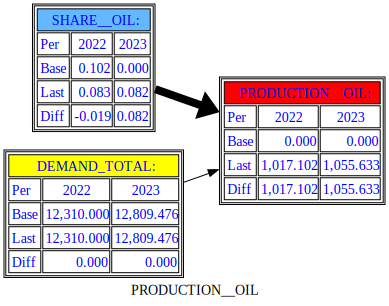

In [110]:
mftt.production__oil.tracepre(fokus2all=1,up=1)

In [107]:
mftt['#Production']

In [103]:
2+2

4

## Save the model 

## Create some senarios

In [118]:
mftt.keep_solutions = {}   # to clean up with new experiments
    
lookat = 'hydro'
for change_cost in [0.0 , -10.0, -25.0, -50.0 , 10.0 , 25.0, 50.0]:

                alternative = baseline.upd(f'capital_subsidy__{lookat} = {change_cost/100}')
                _ = mftt(alternative,2022,2050,
                         keep =(scenario:=f'Cost of {lookat} up {change_cost}'))
                print(scenario)

Cost of hydro up 0.0
Cost of hydro up -10.0
Cost of hydro up -25.0
Cost of hydro up -50.0
Cost of hydro up 10.0
Cost of hydro up 25.0
Cost of hydro up 50.0


In [119]:
mftt.keep_show(select_scenario=1)

In [ ]:
#mftt.share__wind.dash


In [ ]:
mftt.smpl(2023,2030)

In [ ]:
print(mftt.equations_latex)